##**Project Name** - Super_Market_Analysis_Project

###1. Know Your Data


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

#Dataset Loading

In [3]:
#Loading dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
Customer_dataset_path='/content/drive/MyDrive/QVI_purchase_behaviour.csv'
Transaction_dataset_path='/content/drive/MyDrive/QVI_transaction_data.csv'
Customer_data=pd.read_csv(Customer_dataset_path)
Transaction_data=pd.read_csv(Transaction_dataset_path)

In [11]:
# Display the first few rows of each dataset
Transaction_data_head = Transaction_data.head()
Customer_data_head = Customer_data.head()

In [12]:
Transaction_data_head, Customer_data_head

(    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0  43390          1            1000       1         5   
 1  43599          1            1307     348        66   
 2  43605          1            1343     383        61   
 3  43329          2            2373     974        69   
 4  43330          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
 4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  ,
    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
 0            1000   YOUNG SINGLES/COUPLES          Premium
 1            1002   YOUNG SINGLES/COUPLES       Mainstream
 2            1003          YOUNG FAMILIES           Budget
 

In [13]:
# Check for missing values and data types in transaction data
transaction_info = Transaction_data.info()
transaction_missing_values = Transaction_data.isnull().sum()

# Check for missing values and data types in customer data
customer_info = Customer_data.info()
customer_missing_values = Customer_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

In [15]:
print(transaction_info, transaction_missing_values, customer_info, customer_missing_values)

None DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64 None LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


Transaction Data: No missing values. Data types are consistent.

Customer Data: No missing values. Data types are consistent.

##Checking Outliers

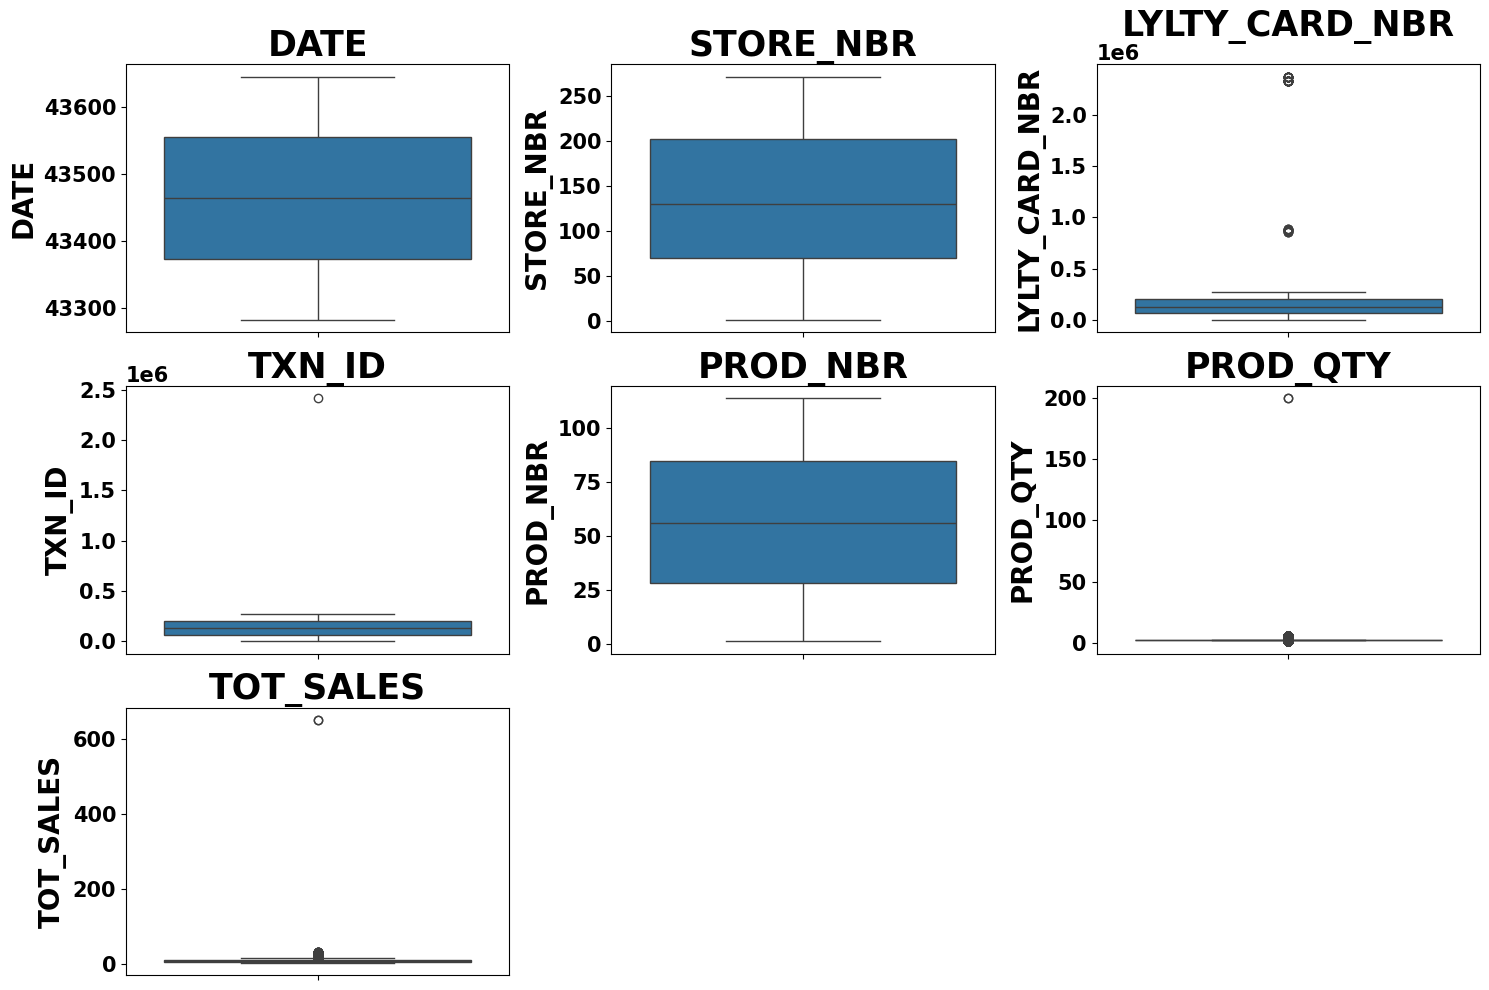

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plotting boxplots for numeric columns
numeric_cols = ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(Transaction_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Outlier Detection Results

Observations:

Most numeric columns show a reasonable range of values.
The PROD_QTY column has visible outliers, which need further investigation.

###Address Outliers in PROD_QTY

In [18]:
# Analyze the distribution of PROD_QTY
prod_qty_description = Transaction_data['PROD_QTY'].describe()
prod_qty_description

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [20]:
# Convert the DATE column assuming the base date is 1899-12-30
base_date = pd.to_datetime('1899-12-30')

# Try converting the DATE column and catch any errors
try:
    Transaction_data['DATE'] = pd.to_datetime(Transaction_data['DATE'], origin=base_date, unit='D')
    print("Date conversion successful!")
except Exception as e:
    print(f"Error during date conversion: {e}")

# Verify the conversion
print(Transaction_data.head())
print(Transaction_data['DATE'].dtype)

Error during date conversion: '0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]' is not compatible with origin='1899-12-30 00:00:00'; it must be numeric with a unit specified
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chick

###Merged the Dataset

In [22]:
# Merge transaction data with customer data on LYLTY_CARD_NBR
merged_data = pd.merge(Transaction_data, Customer_data, on='LYLTY_CARD_NBR', how='inner')

#Visualization

###1. Total Sales

<ipython-input-30-fa93a44b595d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_data, x='STORE_NBR', y='TOT_SALES', estimator=sum, ci=None)


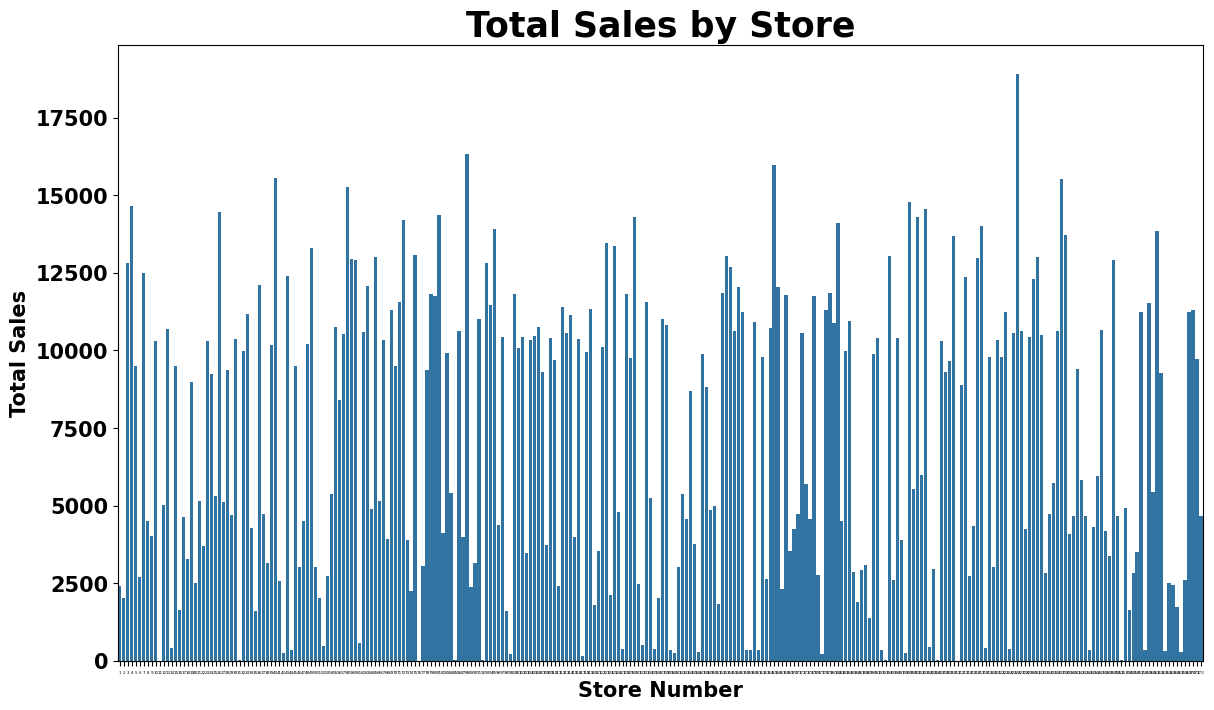

In [30]:
total_sales = merged_data['TOT_SALES'].sum()
plt.figure(figsize=(14, 8))
sns.barplot(data=merged_data, x='STORE_NBR', y='TOT_SALES', estimator=sum, ci=None)
plt.title('Total Sales by Store')
plt.xticks(fontsize=3,fontweight='normal')
plt.xlabel('Store Number',fontsize=15,fontweight='bold')
plt.ylabel('Total Sales',fontsize=15,fontweight='bold')
plt.show()

###2. Sales By Product

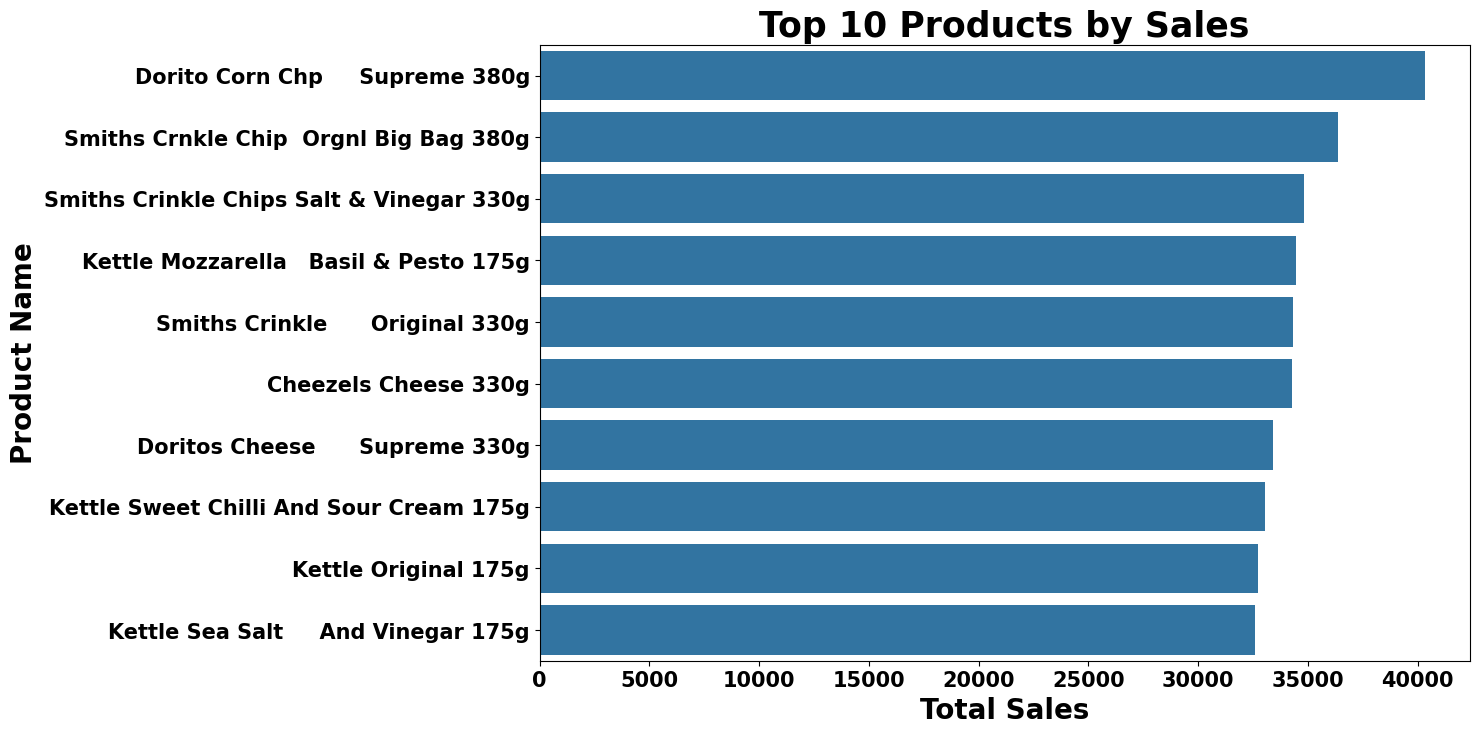

In [32]:
sales_by_product = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products = sales_by_product.sort_values(by='TOT_SALES', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products, x='TOT_SALES', y='PROD_NAME')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

###3.Sales By Customer Segment

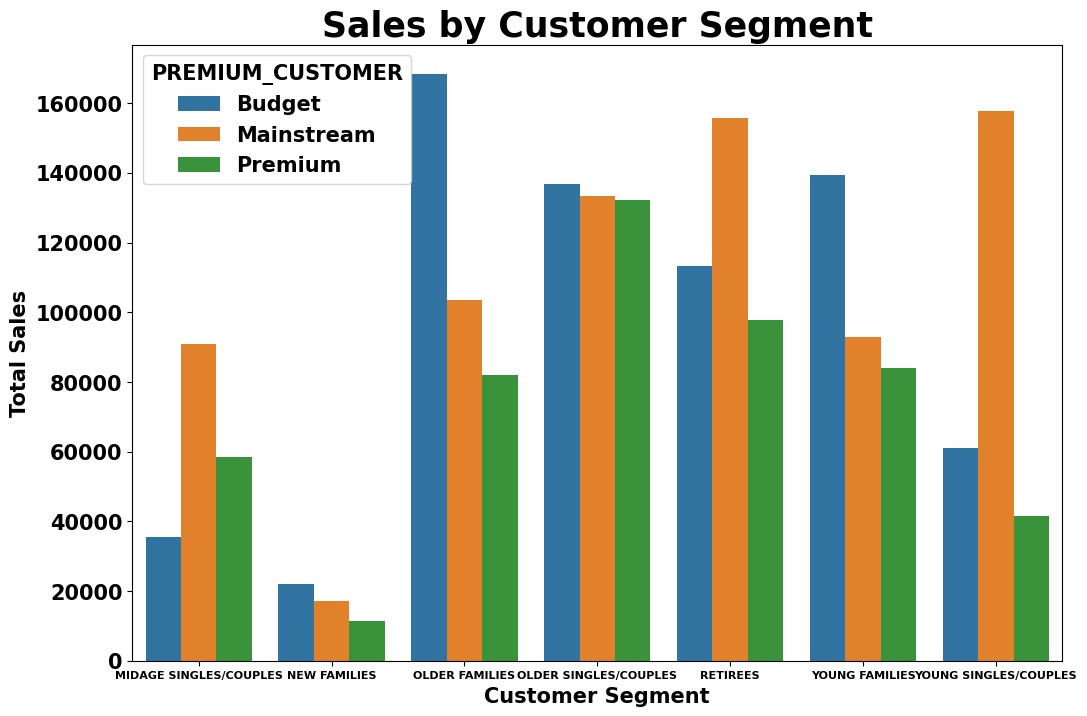

In [36]:
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Sales by Customer Segment')
plt.xticks(fontsize=7)
plt.xlabel('Customer Segment',fontsize=15,fontweight='bold')
plt.ylabel('Total Sales',fontsize=15,fontweight='bold')
plt.show()

###4. Spending pattern

Text(0.5, 1.0, 'Spending Patterns by Customer Segment')

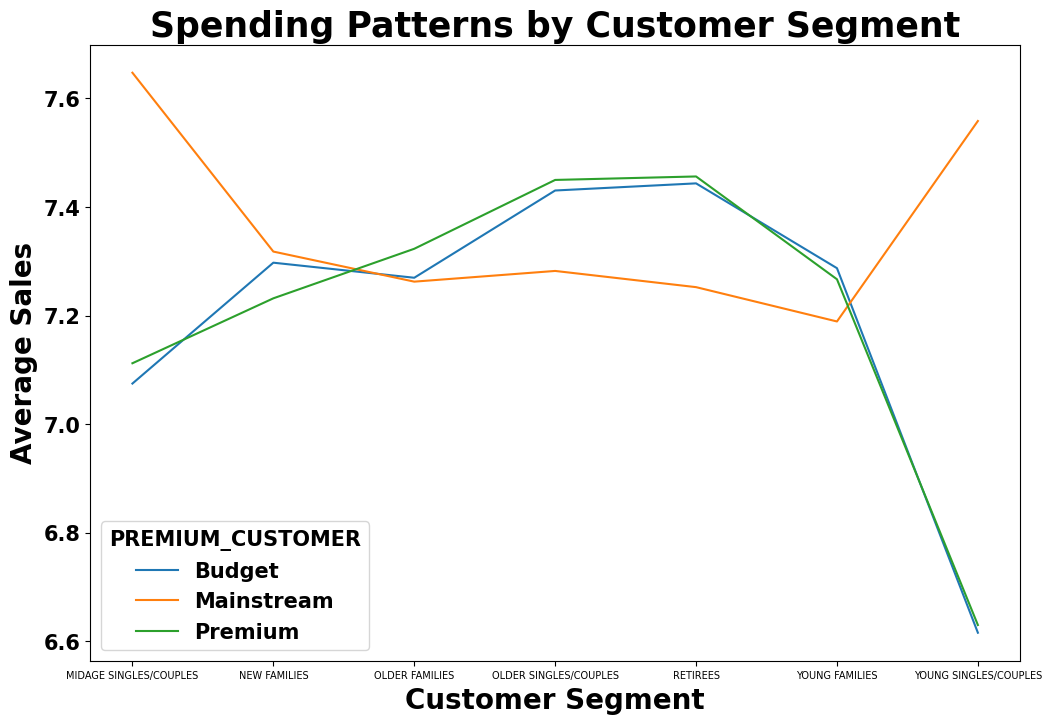

In [38]:
spending_patterns = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
spending_patterns.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_SALES']
plt.figure(figsize=(12, 8))
sns.lineplot(data=spending_patterns, x='LIFESTAGE', y='AVG_SALES', hue='PREMIUM_CUSTOMER')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales')
plt.xticks(fontsize=7,fontweight='normal')
plt.title('Spending Patterns by Customer Segment')


###5.Sales Over Time

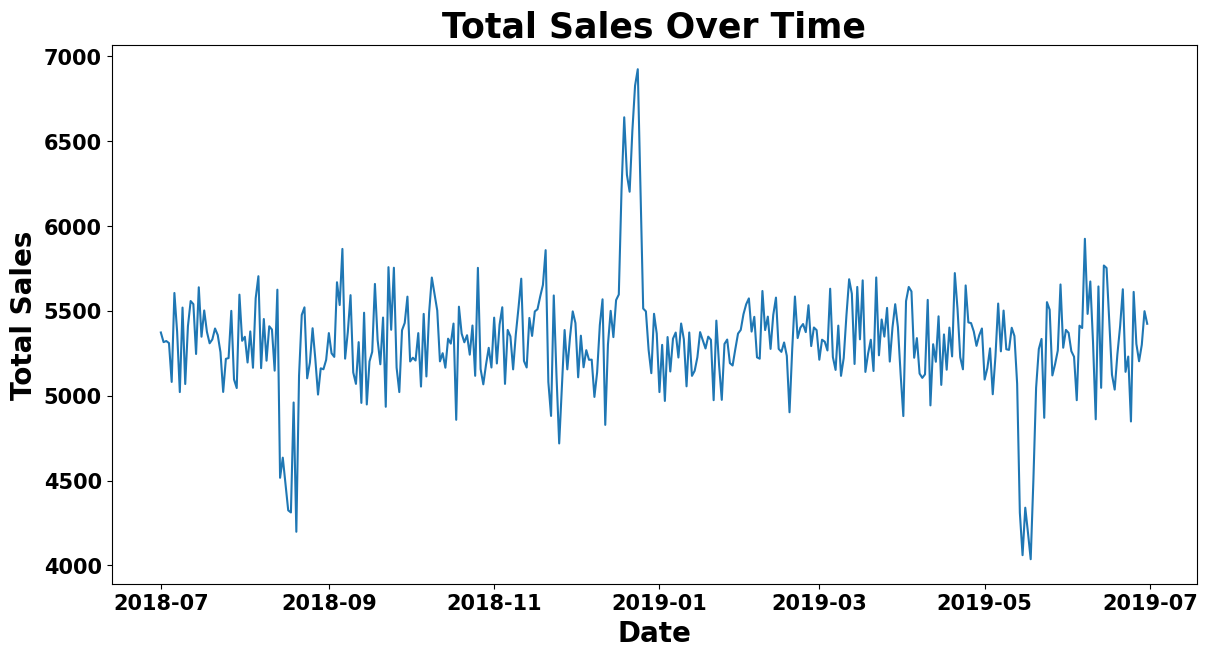

In [39]:
# Aggregate sales by date
sales_over_time = merged_data.groupby('DATE')['TOT_SALES'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_over_time, x='DATE', y='TOT_SALES')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


###6.Average Purchase Quantity by Customer Segment(Chip Purchasing behaviour)


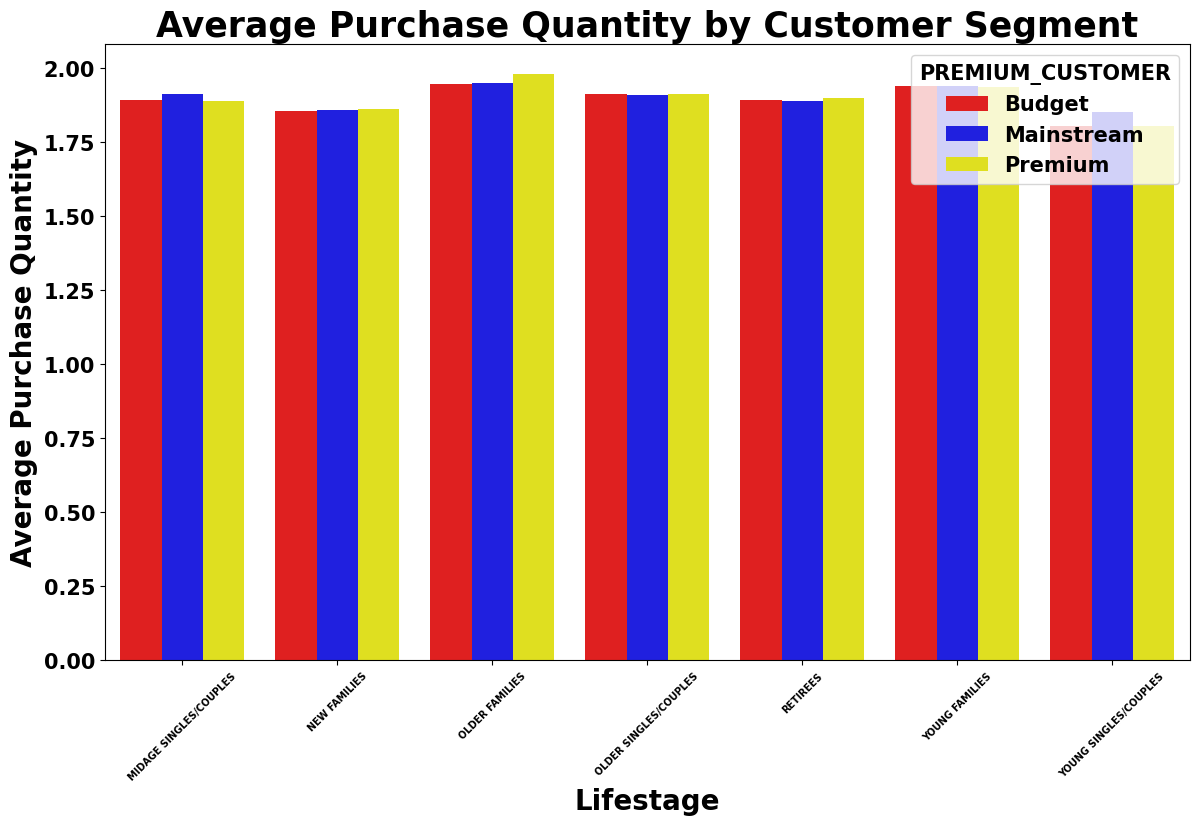

In [46]:
# Aggregate average purchase quantity by customer segment
avg_qty_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Plot average purchase quantity by customer segment
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_qty_by_segment, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER',palette=["Red","Blue","Yellow"] )
plt.title('Average Purchase Quantity by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Purchase Quantity')
plt.xticks(rotation=45,fontsize=7)
plt.show()


##Conclusion:

**1. Top-Selling Products:**

  The top 10 products contribute significantly to the overall sales. This indicates a high concentration of sales among a few popular products.

**2.Sales Trends Over Time:**

The sales trend over time shows certain periods with higher sales, which could be influenced by promotions, seasonality, or other external factors.

**3.Customer Segments:**

Different customer segments (based on LIFESTAGE and PREMIUM_CUSTOMER) show varying levels of total sales. Certain segments, such as young professionals and premium customers, tend to have higher total sales.

**4.Chip Purchasing Behavior:**

The average purchase quantity of chips varies across customer segments. Premium customers and younger demographics tend to purchase more chips per transaction compared to other segments.

##Recommendations:

**1.Focus on Top-Selling Products:**

Continue to stock and promote the top-selling products as they contribute significantly to overall sales. Consider exclusive promotions or discounts for these items to further boost sales.

**2.Seasonal Promotions:**

Identify the high sales periods from the sales trend analysis and plan targeted promotions and marketing campaigns around these times to capitalize on increased consumer spending.

**3.Target High-Value Customer Segments:**

Allocate more marketing resources towards high-value customer segments such as young professionals and premium customers. Tailor marketing messages to resonate with these segments' preferences and lifestyles.

**4.Enhance Chip Offerings:**

Since chips are a popular item, consider expanding the product range with new flavors or limited edition products. Implement bundled offers or loyalty rewards for frequent chip buyers to encourage repeat purchases.

**5.Customer Retention Strategies:**

Develop loyalty programs and personalized marketing strategies to retain premium customers. Use insights from purchase behavior to create customized offers that appeal to their purchasing patterns.

**6.Monitor and Adapt:**

Continuously monitor sales data and customer behavior to identify emerging trends and adjust strategies accordingly. Use real-time data to stay agile and responsive to market changes.